**1**. (20 points) 

Create a `pandas` DataFrame with these values

|name|a-b-|a-b+|a+b-|a+b+|
|-|-|-|-|-|
|ann|1|2|3|4|
|bob|5|6|7|8|

Now convert it to another DataFrame so that it looks like

|    | name   | a   | b   |   value |
|---:|:-------|:----|:----|--------:|
|  0 | ann    | -   | -   |       1 |
|  2 | ann    | -   | +   |       2 |
|  4 | ann    | +   | -   |       3 |
|  6 | ann    | +   | +   |       4 |
|  1 | bob    | -   | -   |       5 |
|  3 | bob    | -   | +   |       6 |
|  5 | bob    | +   | -   |       7 |
|  7 | bob    | +   | +   |       8 |

Note - all information used to construct the second DataFrame must be derived from the first one.

In [257]:
import pandas as pd
#create the dataframe

df = pd.DataFrame(data = {
    'name': ['ann', 'bob'],
    'a-b-': [1, 5],
    'a-b+': [2, 6],
    'a+b-': [3, 7],
    'a+b+': [4, 8]
})

df.style.hide_index()

name,a-b-,a-b+,a+b-,a+b+
ann,1,2,3,4
bob,5,6,7,8


In [29]:
# Starting point: convert the wide table to long
long_df = df.melt(id_vars = ['name'])
long_df

,name,variable,value
0,ann,a-b-,1
1,bob,a-b-,5
2,ann,a-b+,2
3,bob,a-b+,6
4,ann,a+b-,3
5,bob,a+b-,7
6,ann,a+b+,4
7,bob,a+b+,8


In [259]:
long_df.variable.str.split('a|b', expand = True).drop(columns = [0])

,1,2
0,-,-
1,-,-
2,-,+
3,-,+
4,+,-
5,+,-
6,+,+
7,+,+


In [39]:
long_df[['a', 'b']] = long_df.variable.str.split('a|b', expand = True).drop(columns = [0])

In [42]:
long_df[['name', 'a', 'b', 'value']].sort_values(by = 'name')

,name,a,b,value
0,ann,-,-,1
2,ann,-,+,2
4,ann,+,-,3
6,ann,+,+,4
1,bob,-,-,5
3,bob,-,+,6
5,bob,+,-,7
7,bob,+,+,8


In [260]:
long_df_2.variable.str.extract('a(.)b(.)')

,0,1
0,-,-
1,-,-
2,-,+
3,-,+
4,+,-
5,+,-
6,+,+
7,+,+


In [60]:
long_df_2 = df.melt(id_vars = ['name'])
long_df_2[['a', 'b']] = long_df_2.variable.str.extract('a(.)b(.)')
long_df_2[['name', 'a', 'b', 'value']].sort_values(by = 'name')

,name,a,b,value
0,ann,-,-,1
2,ann,-,+,2
4,ann,+,-,3
6,ann,+,+,4
1,bob,-,-,5
3,bob,-,+,6
5,bob,+,-,7
7,bob,+,+,8


If you want a fully automatic version that extracts the variable name, you can use `extractall`.

In [263]:
long_df_3.variable.str.extractall(r'([a-z])([\+|\-])').reset_index().pivot(index = 'level_0', columns = 0, values = 1)

,a,b
level_0,,
0,-,-
1,-,-
2,-,+
3,-,+
4,+,-
5,+,-
6,+,+
7,+,+


In [81]:
long_df_3 = df.melt(id_vars = ['name'])
tmp_df = long_df_3.variable.str.extractall(r'([a-z])([\+|\-])')
tmp_df.reset_index().pivot(index = 'level_0', columns = 0, values = 1).reset_index(drop = True)

,a,b
0,-,-
1,-,-
2,-,+
3,-,+
4,+,-
5,+,-
6,+,+
7,+,+


**2**. (20 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [94]:
## import numpy as np
n, k = 10000, 100
result = np.random.randint(2, size = (n, k))
result

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [108]:
def find_longest(num_list):
    max_len, cur_len = 0, 0
    for num in num_list:
        if num == 1:
            cur_len += 1
        else:
            max_len = max(max_len, cur_len)
            cur_len = 0
    return max_len

np.bincount(np.apply_along_axis(find_longest, 1, result)).argmax()

5

**Self read**: You can also calculate the current run length $b_k$ by $b_k = (b_{k-1} + 1) a_k$. That means:

- If $a_k = 0$, then $b_k = 0$. The current run stops.

- If $a_k = 1$, then $b_k = b_{k - 1} + 1$. The current run length increments by 1.

The starting position $b_0 = a_0$.

Note the operation here is automatically vectorized.

In [107]:
len_array = np.zeros((n, k), dtype = int)
len_array[:, 0] = result[:, 0]
for col_index in range(1, k):
    len_array[:, col_index] = (len_array[:, col_index - 1] + 1) * result[:, col_index]
np.bincount(np.max(len_array, axis = 1)).argmax()

5

**3**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [114]:
def eratosthenes(n):
    res = [True] * (n + 1)
    res[0] = res[1] = False
    for p in range(2, n + 1): # can improve the upper bound by sqrt(n)
        if not res[p]: # p is not prime
            continue

        # Sieve
        for k in range(2 * p, n + 1, p):
            res[k] = False
    
    return np.where(res)[0]

eratosthenes(1000)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

**4**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
```

which you feed into your `make_plots` function
```python
make_plots(rules, niter)
```

You may, of course, write other helper functions to keep your code modular.

In [186]:
get_bin_digits = lambda n: [(n >> i) & 1 for i in range(8)]
#get_bin_digits = lambda n: [(n // (2 ** i)) % 2 for i in range(8)]

def make_array(rule, niter):
    res = np.zeros((niter, 2 * niter + 1), dtype = int)
    res[0, niter] = 1
    
    rule_map = get_bin_digits(rule)

    for i in range(1, niter):
        values = 4 * res[i - 1, :-2] + 2 * res[i - 1, 1:-1] + res[i - 1, 2:]
        res[i, 1:-1] = [rule_map[val] for val in values]
        res[i, 0] = res[i, -1] = res[i, 1]

    return res[:, 1:-1]

In [264]:
%%time 

tmp = make_array(30, 1500)

CPU times: user 1.02 s, sys: 52 ms, total: 1.07 s
Wall time: 1.07 s


In [251]:
from matplotlib import pyplot as plt

def make_plot(rule, niter, ax):
    ax.imshow(1 - make_array(rule, niter), 'gray', aspect = 'equal')
    ax.set_xticks([0.5 + i for i in range(2 * niter - 1)])
    ax.set_yticks([-0.5 + i for i in range(niter + 1)])
    ax.tick_params(axis='x', colors=(0,0,0,0))
    ax.tick_params(axis='y', colors=(0,0,0,0))
    ax.set_title(f'Rule {rule}')
    ax.grid()

In [252]:
def make_plots(rules, niter):
    n_plots = len(rules)
    ncols = 5
    nrows = (n_plots - 1) // ncols + 1
    fig, ax = plt.subplots(figsize = (15, 9 / ncols * nrows), nrows = nrows, ncols = ncols)
    if n_plots > ncols:
        for i, rule in enumerate(rules):
            make_plot(rule, niter, ax[i // ncols, i % ncols])
    else:
        for i, rule in enumerate(rules):
            make_plot(rule, niter, ax[i % ncols])
    for i in range(n_plots, nrows * ncols):
        ax.flat[i].set_visible(False)

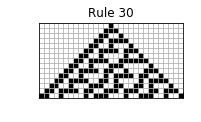

In [253]:
make_plots([30], 15)

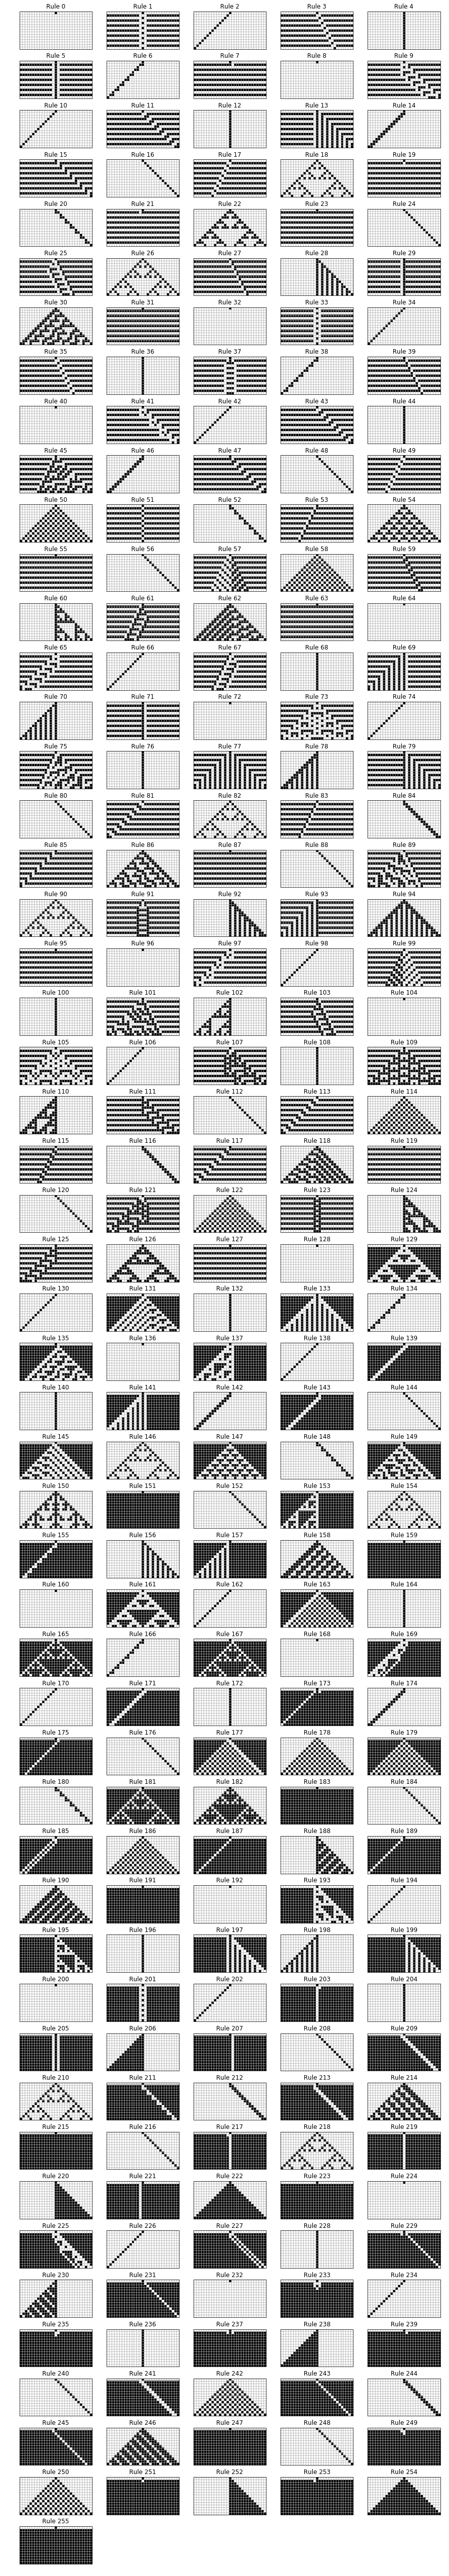

In [254]:
make_plots(range(256), 15)